<a href="https://colab.research.google.com/github/arellana/Tesis/blob/main/entornoMaximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#import sys
#sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')
#from google.colab import files
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##### prueba #####

ruta = '/content/drive/MyDrive/Tesis de Javi/DatosSimu/'+'DU1'+'-N='+str(50)+'-S='+str(10000)+'.txt'
dat = np.loadtxt(ruta, delimiter=';')

In [3]:
def entornoMaximo(dat, parametro, delta, bin): 
    
    b = plt.hist(dat[parametro],bins=bin)
    plt.title('Histograma a recortar')

    y = np.asarray(b[0])
    x = np.asarray(b[1])

    ind = np.where(y==y.max())
    maximo = x[ind]

    print('Valor mas probable: '+str(x[ind][0]))
    print('Conteo maximo: ', y.max())

    #parametro es el indice del parametro sobre el que quiero acotar (ej: l1 = 4)
    pMax = np.where(dat[parametro] <= (maximo+delta))[0]#, l1 >= (maximo-delta))

    aux = np.zeros((7,len(pMax)))

    for k in range(7):
        for i in range(len(pMax)):
            aux[k][i] = dat[k][pMax[i]]

    #sns.histplot(aux[4],bins=100)

    pMin = np.where(aux[parametro] >= (maximo-delta))[0]

    cor = np.zeros((7,len(pMin)))
    
    for l in range(7):
        for j in range(len(pMin)):
            cor[l][j] = aux[l][pMin[j]]

    plt.hist(cor[parametro],bins=30,label='recortado')
    plt.legend()
    #sns.histplot(cor[4])

    return cor

Valor mas probable: 0.0009903793863115366
Conteo maximo:  608.0


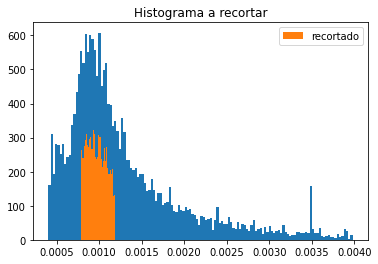

In [4]:
cortados = entornoMaximo(dat,3,0.0002,134)

In [ ]:
#plt.hist(dat[4],bins=150)
sns.histplot(cortados[4],bins=60,color='b')